In [1]:
from methods import *
import os, shutil

In [3]:
output_file_weda = "tsne" + '/train_weda.txt'
train_orig = "tsne/train_orig.txt"
gen_standard_aug_weda(train_orig, output_file_weda, num_aug=9)

finished weda for tsne/train_orig.txt to tsne/train_weda.txt


In [10]:
huge_word2vec = 'word2vec/glove.840B.300d.txt'
word2vec_len = 300

word2vec_pickle = dataset_folder + '/word2vec.p'
gen_vocab_dicts(dataset_folder, word2vec_pickle, huge_word2vec)

['tsne/test.txt', 'tsne/train_orig.txt', 'tsne/train_weda.txt']
27936 unique words found
20835 matches between unique words and word2vec dictionary
dictionaries outputted to tsne/word2vec.p


In [16]:
def run_cnn_tsne(train_file, test_file, num_classes, input_size, percent_dataset):
    word2vec_pickle = "tsne" + '/word2vec.p'
    word2vec = load_pickle(word2vec_pickle)
        
    #initialize model
    model = build_cnn(input_size, word2vec_len, num_classes)

    #load data
    train_x, train_y = get_x_y(train_file, num_classes, word2vec_len, input_size, word2vec, percent_dataset)
    test_x, test_y = get_x_y(test_file, num_classes, word2vec_len, input_size, word2vec, 1)

    #implement early stopping
    callbacks = [EarlyStopping(monitor='val_loss', patience=3)]

    #train model
    model.fit(	train_x, 
                train_y, 
                epochs=10, 
                callbacks=callbacks,
                validation_split=0.1, 
                batch_size=1024, 
                shuffle=True, 
                verbose=1)
    #model.save('checkpoints/lol')
    #model = load_model('checkpoints/lol')

    #evaluate model
    y_pred = model.predict(test_x)
    test_y_cat = one_hot_to_categorical(test_y)
    y_pred_cat = one_hot_to_categorical(y_pred)
    acc = accuracy_score(test_y_cat, y_pred_cat)

    #clean memory???
    train_x, train_y = None, None
    gc.collect()

    #return the accuracy
    #print("data with shape:", train_x.shape, train_y.shape, 'train=', train_file, 'test=', test_file, 'with fraction', percent_dataset, 'had acc', acc)
    return acc, model



In [19]:
#for storing last layer representations
last_layer_cnn_no_aug = []
last_layer_cnn_aug = []


#initialize all the variables
dataset_folder = "tsne"
num_classes = 2
input_size = 50
word2vec_pickle = dataset_folder + '/word2vec.p'
word2vec = load_pickle(word2vec_pickle)

train_path = 'tsne/train_orig.txt'
test_path = 'tsne/test.txt'
acc, model = run_cnn_tsne(train_path, test_path, num_classes, input_size, percent_dataset=1)
print("cnn", acc)   
model.pop()

Epoch 1/10
7/7 [==============================] - 4s 361ms/step - loss: 0.6810 - accuracy: 0.5556 - val_loss: 0.6284 - val_accuracy: 0.7149
Epoch 2/10
7/7 [==============================] - 2s 347ms/step - loss: 0.6093 - accuracy: 0.7302 - val_loss: 0.5582 - val_accuracy: 0.7432
Epoch 3/10
7/7 [==============================] - 2s 308ms/step - loss: 0.5234 - accuracy: 0.7948 - val_loss: 0.4827 - val_accuracy: 0.7649
Epoch 4/10
7/7 [==============================] - 2s 291ms/step - loss: 0.4444 - accuracy: 0.8130 - val_loss: 0.4415 - val_accuracy: 0.7865
Epoch 5/10
7/7 [==============================] - 2s 295ms/step - loss: 0.3831 - accuracy: 0.8352 - val_loss: 0.4317 - val_accuracy: 0.7811
Epoch 6/10
7/7 [==============================] - 2s 307ms/step - loss: 0.3515 - accuracy: 0.8521 - val_loss: 0.4273 - val_accuracy: 0.7838
Epoch 7/10
7/7 [==============================] - 2s 298ms/step - loss: 0.3215 - accuracy: 0.8687 - val_loss: 0.4264 - val_accuracy: 0.7851
Epoch 8/10
7/7 [====

In [20]:
#load data
output_file_weda = "tsne" + '/train_weda.txt'
train_orig = "tsne/train_orig.txt"
orig_x, orig_y = get_x_y(train_orig, num_classes, word2vec_len, input_size, word2vec, 1)
aug_x, aug_y = get_x_y(output_file_weda, num_classes, word2vec_len, input_size, word2vec, 1)


output_orig_x = model(orig_x)
output_aug_x = model(aug_x)


In [22]:
print(output_orig_x.shape)

(7393, 20)


In [ ]:
output_orig_x = np.array(output_orig_x)

In [26]:
# do tsne on output orig_x + plot
print(output_orig_x.shape)
from sklearn.manifold import TSNE

orig_tsne =  TSNE(n_components=2, init='random').fit_transform(output_orig_x)



(7393, 20)


TypeError: 'tuple' object is not callable

(7393, 2)


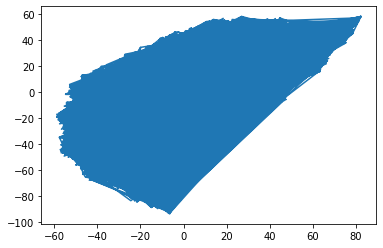

In [28]:
import matplotlib.pyplot as plt
print(orig_tsne.shape)
plt.plot(orig_tsne[:,0], orig_tsne[:,1])
plt.show()
# TODO: properly plot this with colours, smaller subset of the dataset and then plot also the augmented data